# 附件一预处理（不包括异常值剔除及标准化）

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("Data\\First\\New\\201404090110.xlsx",sheet_name='201404090110')
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,9,1:11: 0,199,0,-9,30.0,8.25,DOWN,False,...,2.58,0.75,-1.63,-2.74,-1.61,-0.0625,机场68,机场118,-0.0625,385440
1,4,9,1:11: 1,199,0,-9,30.0,8.50,DOWN,False,...,1.17,-0.88,-1.50,-1.57,-2.06,-0.0625,机场68,机场118,-0.0625,385440
2,4,9,1:11: 2,199,0,-9,30.0,8.50,DOWN,False,...,3.50,4.06,-2.84,-0.69,-2.78,-0.0625,机场68,机场118,-0.0625,385440
3,4,9,1:11: 3,199,0,-9,30.0,8.75,DOWN,False,...,4.24,3.29,-0.99,-2.01,-2.06,-0.0625,机场68,机场118,-0.0625,385440
4,4,9,1:11: 4,199,0,-9,30.0,8.75,DOWN,False,...,4.12,2.93,-0.36,-3.28,-0.50,-0.0625,机场68,机场118,-0.0625,385440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47552,4,9,14:23:46,205,-2,-8,30.0,1.00,DOWN,False,...,-0.09,0.04,-4.03,-4.07,-3.96,0.0000,机场68,机场118,0.0000,264160
47553,4,9,14:23:47,205,-8,-8,30.0,1.00,DOWN,False,...,0.18,0.06,-4.02,-4.08,-3.96,0.0000,机场68,机场118,0.0000,264160
47554,4,9,14:23:48,205,-8,-8,30.0,1.00,DOWN,False,...,0.04,-0.12,-4.05,-4.09,-3.98,-0.0625,机场68,机场118,-0.0625,264160
47555,4,9,14:23:49,205,-6,-8,30.0,1.00,DOWN,False,...,0.27,-0.02,-3.99,-4.04,-3.94,-0.0625,机场68,机场118,-0.0625,264000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47557 entries, 0 to 47556
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   月              47557 non-null  int64  
 1   日              47557 non-null  int64  
 2   具体时间           47557 non-null  object 
 3   海拔高度           47557 non-null  int64  
 4   下降率            47557 non-null  int64  
 5   无线电高度          47557 non-null  int64  
 6   计算空速           47557 non-null  float64
 7   地速             47557 non-null  float64
 8   起落架            2071 non-null   object 
 9   空地电门0.2秒       47557 non-null  bool   
 10  空地电门0.4秒       47557 non-null  bool   
 11  空地电门0.6秒       47557 non-null  bool   
 12  空地电门0.8秒       47557 non-null  bool   
 13  空地电门1秒         47557 non-null  bool   
 14  着陆G值0.1秒       47557 non-null  float64
 15  着陆G值0.2秒       47557 non-null  float64
 16  着陆G值0.3秒       47557 non-null  float64
 17  着陆G值0.4秒       47557 non-null  float64
 18  着陆G值0.

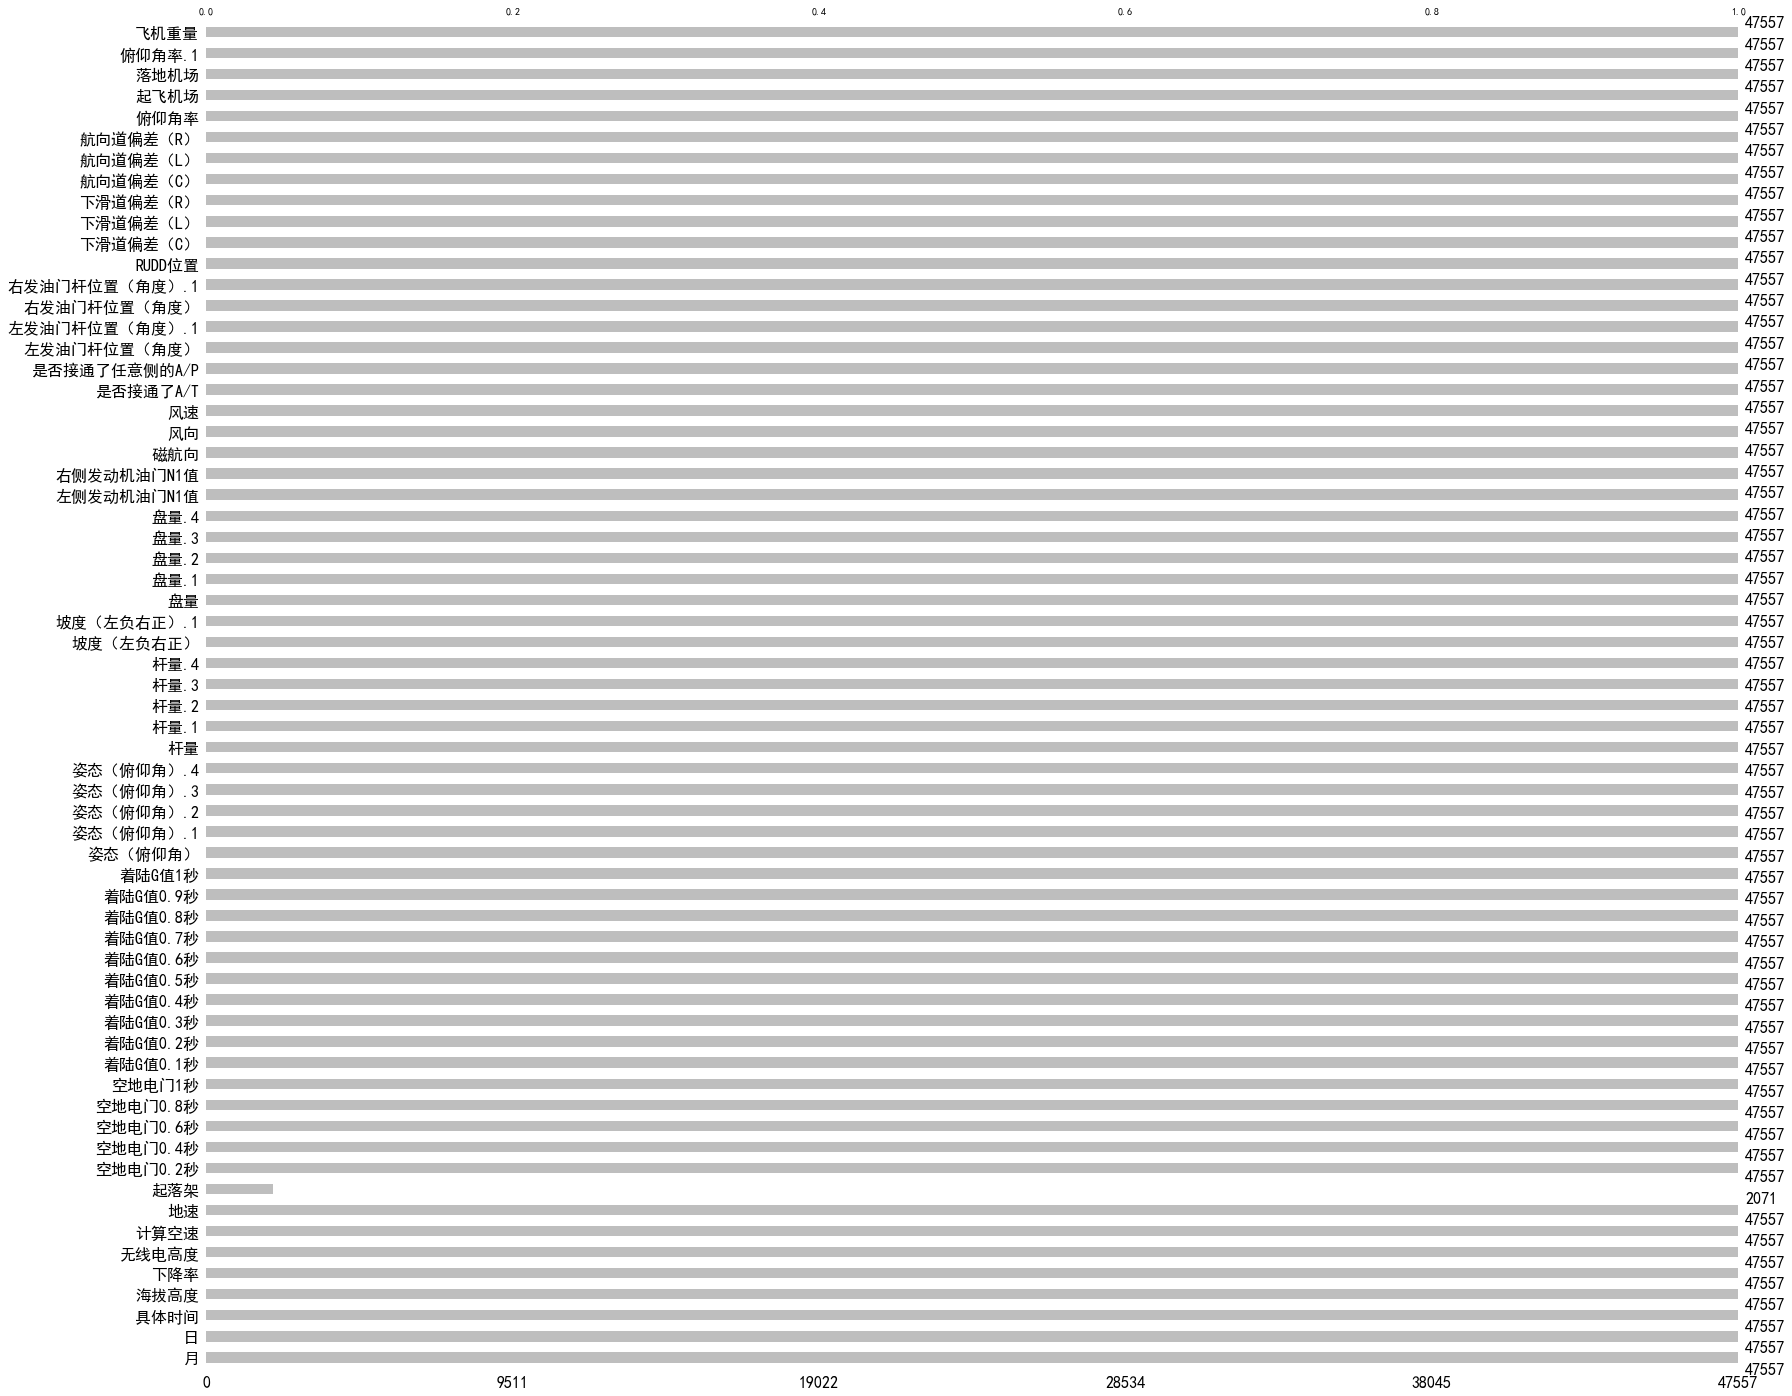

In [4]:
import missingno
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
missingno.bar(data, color=(190/255,190/255,190/255))
plt.tight_layout()

In [5]:
data.replace({"起落架":{'DOWN':1},
              "空地电门0.2秒":{True:1,False:0},
              "空地电门0.4秒":{True:1,False:0},
              "空地电门0.6秒":{True:1,False:0},
              "空地电门0.8秒":{True:1,False:0},
              "空地电门1秒":{True:1,False:0},
              "是否接通了A/T":{'DISENGD':0,'ENGAGED':1},
              "是否接通了任意侧的A/P":{'OFF':0,'ON':1},
              }, inplace=True)
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,9,1:11: 0,199,0,-9,30.0,8.25,1.0,0,...,2.58,0.75,-1.63,-2.74,-1.61,-0.0625,机场68,机场118,-0.0625,385440
1,4,9,1:11: 1,199,0,-9,30.0,8.50,1.0,0,...,1.17,-0.88,-1.50,-1.57,-2.06,-0.0625,机场68,机场118,-0.0625,385440
2,4,9,1:11: 2,199,0,-9,30.0,8.50,1.0,0,...,3.50,4.06,-2.84,-0.69,-2.78,-0.0625,机场68,机场118,-0.0625,385440
3,4,9,1:11: 3,199,0,-9,30.0,8.75,1.0,0,...,4.24,3.29,-0.99,-2.01,-2.06,-0.0625,机场68,机场118,-0.0625,385440
4,4,9,1:11: 4,199,0,-9,30.0,8.75,1.0,0,...,4.12,2.93,-0.36,-3.28,-0.50,-0.0625,机场68,机场118,-0.0625,385440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47552,4,9,14:23:46,205,-2,-8,30.0,1.00,1.0,0,...,-0.09,0.04,-4.03,-4.07,-3.96,0.0000,机场68,机场118,0.0000,264160
47553,4,9,14:23:47,205,-8,-8,30.0,1.00,1.0,0,...,0.18,0.06,-4.02,-4.08,-3.96,0.0000,机场68,机场118,0.0000,264160
47554,4,9,14:23:48,205,-8,-8,30.0,1.00,1.0,0,...,0.04,-0.12,-4.05,-4.09,-3.98,-0.0625,机场68,机场118,-0.0625,264160
47555,4,9,14:23:49,205,-6,-8,30.0,1.00,1.0,0,...,0.27,-0.02,-3.99,-4.04,-3.94,-0.0625,机场68,机场118,-0.0625,264000


In [6]:
data=data.fillna(0)
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,9,1:11: 0,199,0,-9,30.0,8.25,1.0,0,...,2.58,0.75,-1.63,-2.74,-1.61,-0.0625,机场68,机场118,-0.0625,385440
1,4,9,1:11: 1,199,0,-9,30.0,8.50,1.0,0,...,1.17,-0.88,-1.50,-1.57,-2.06,-0.0625,机场68,机场118,-0.0625,385440
2,4,9,1:11: 2,199,0,-9,30.0,8.50,1.0,0,...,3.50,4.06,-2.84,-0.69,-2.78,-0.0625,机场68,机场118,-0.0625,385440
3,4,9,1:11: 3,199,0,-9,30.0,8.75,1.0,0,...,4.24,3.29,-0.99,-2.01,-2.06,-0.0625,机场68,机场118,-0.0625,385440
4,4,9,1:11: 4,199,0,-9,30.0,8.75,1.0,0,...,4.12,2.93,-0.36,-3.28,-0.50,-0.0625,机场68,机场118,-0.0625,385440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47552,4,9,14:23:46,205,-2,-8,30.0,1.00,1.0,0,...,-0.09,0.04,-4.03,-4.07,-3.96,0.0000,机场68,机场118,0.0000,264160
47553,4,9,14:23:47,205,-8,-8,30.0,1.00,1.0,0,...,0.18,0.06,-4.02,-4.08,-3.96,0.0000,机场68,机场118,0.0000,264160
47554,4,9,14:23:48,205,-8,-8,30.0,1.00,1.0,0,...,0.04,-0.12,-4.05,-4.09,-3.98,-0.0625,机场68,机场118,-0.0625,264160
47555,4,9,14:23:49,205,-6,-8,30.0,1.00,1.0,0,...,0.27,-0.02,-3.99,-4.04,-3.94,-0.0625,机场68,机场118,-0.0625,264000


In [7]:
data.drop(labels=['月','日','起飞机场','落地机场','飞机重量'],axis=1,inplace=True)
data

,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,1:11: 0,199,0,-9,30.0,8.25,1.0,0,0,0,...,34.1895,-0.2617,2.71,2.58,0.75,-1.63,-2.74,-1.61,-0.0625,-0.0625
1,1:11: 1,199,0,-9,30.0,8.50,1.0,0,0,0,...,34.1895,-0.2637,1.40,1.17,-0.88,-1.50,-1.57,-2.06,-0.0625,-0.0625
2,1:11: 2,199,0,-9,30.0,8.50,1.0,0,0,0,...,34.1895,-0.2637,3.65,3.50,4.06,-2.84,-0.69,-2.78,-0.0625,-0.0625
3,1:11: 3,199,0,-9,30.0,8.75,1.0,0,0,0,...,34.1895,-0.2637,4.08,4.24,3.29,-0.99,-2.01,-2.06,-0.0625,-0.0625
4,1:11: 4,199,0,-9,30.0,8.75,1.0,0,0,0,...,34.1895,-0.2637,4.05,4.12,2.93,-0.36,-3.28,-0.50,-0.0625,-0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47552,14:23:46,205,-2,-8,30.0,1.00,1.0,0,0,0,...,34.1895,-0.3711,0.16,-0.09,0.04,-4.03,-4.07,-3.96,0.0000,0.0000
47553,14:23:47,205,-8,-8,30.0,1.00,1.0,0,0,0,...,34.2334,-0.2676,0.07,0.18,0.06,-4.02,-4.08,-3.96,0.0000,0.0000
47554,14:23:48,205,-8,-8,30.0,1.00,1.0,0,0,0,...,34.2334,-0.2676,-0.06,0.04,-0.12,-4.05,-4.09,-3.98,-0.0625,-0.0625
47555,14:23:49,205,-6,-8,30.0,1.00,1.0,0,0,0,...,34.2334,-0.2598,-0.21,0.27,-0.02,-3.99,-4.04,-3.94,-0.0625,-0.0625


# QAR异常判断，剔除

In [8]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup', dup_row)
data[data['is_dup'] == True]

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
174,True,1:13:54,187,12,-8,30.000,11.50,1.0,0,0,...,34.1895,-0.2617,-4.03,-4.02,-1.64,-4.49,-4.68,-4.46,-0.0625,-0.0625
175,True,1:13:54,187,12,-8,30.000,11.75,1.0,0,0,...,34.1895,-0.2617,-2.67,-2.64,-1.46,-3.72,-4.26,-3.74,0.0000,0.0000
3360,True,2: 7: 1,29104,-20,1404,328.750,493.50,0.0,1,1,...,62.5342,-0.2812,-0.07,0.01,-0.07,0.00,-0.12,-0.09,-0.0625,-0.0625
3361,True,2: 7: 1,29100,-12,1404,328.250,493.50,0.0,1,1,...,62.5342,-0.2695,0.01,-0.13,-0.13,-0.08,-0.08,-0.12,0.0625,0.0625
6587,True,3: 0:49,29097,-51,1404,329.250,549.25,0.0,1,1,...,61.3916,-0.2441,-0.31,0.16,-0.13,3.62,3.39,3.64,0.0000,0.0000
6588,True,3: 0:49,29100,-35,1404,329.375,549.25,0.0,1,1,...,61.3916,-0.2441,0.06,0.05,-0.03,3.82,3.62,3.98,-0.1250,-0.1250
9830,True,3:54:53,29016,-111,1404,328.375,498.50,0.0,1,1,...,63.3691,-0.2637,-0.12,-0.06,0.01,-0.16,-0.01,0.06,0.0000,0.0000
9831,True,3:54:53,29018,-113,1404,329.000,498.75,0.0,1,1,...,63.4131,-0.2891,-0.02,-0.15,0.09,-0.03,-0.19,-0.07,-0.0625,-0.0625
13070,True,4:48:54,29004,-78,1404,331.875,498.00,0.0,1,1,...,68.2031,-0.2637,-0.03,-0.05,0.04,-0.14,-0.04,0.01,0.0625,0.0625
13071,True,4:48:54,29005,-81,1404,332.000,498.25,0.0,1,1,...,69.3896,-0.2656,0.00,-0.04,-0.02,-0.22,-0.10,0.02,0.1875,0.1875


In [9]:
data=data.drop_duplicates(subset=['具体时间'],keep='first')
data

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,False,1:11: 0,199,0,-9,30.0,8.25,1.0,0,0,...,34.1895,-0.2617,2.71,2.58,0.75,-1.63,-2.74,-1.61,-0.0625,-0.0625
1,False,1:11: 1,199,0,-9,30.0,8.50,1.0,0,0,...,34.1895,-0.2637,1.40,1.17,-0.88,-1.50,-1.57,-2.06,-0.0625,-0.0625
2,False,1:11: 2,199,0,-9,30.0,8.50,1.0,0,0,...,34.1895,-0.2637,3.65,3.50,4.06,-2.84,-0.69,-2.78,-0.0625,-0.0625
3,False,1:11: 3,199,0,-9,30.0,8.75,1.0,0,0,...,34.1895,-0.2637,4.08,4.24,3.29,-0.99,-2.01,-2.06,-0.0625,-0.0625
4,False,1:11: 4,199,0,-9,30.0,8.75,1.0,0,0,...,34.1895,-0.2637,4.05,4.12,2.93,-0.36,-3.28,-0.50,-0.0625,-0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47552,False,14:23:46,205,-2,-8,30.0,1.00,1.0,0,0,...,34.1895,-0.3711,0.16,-0.09,0.04,-4.03,-4.07,-3.96,0.0000,0.0000
47553,False,14:23:47,205,-8,-8,30.0,1.00,1.0,0,0,...,34.2334,-0.2676,0.07,0.18,0.06,-4.02,-4.08,-3.96,0.0000,0.0000
47554,False,14:23:48,205,-8,-8,30.0,1.00,1.0,0,0,...,34.2334,-0.2676,-0.06,0.04,-0.12,-4.05,-4.09,-3.98,-0.0625,-0.0625
47555,False,14:23:49,205,-6,-8,30.0,1.00,1.0,0,0,...,34.2334,-0.2598,-0.21,0.27,-0.02,-3.99,-4.04,-3.94,-0.0625,-0.0625


In [10]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup_N', dup_row)
data[data['is_dup_N'] == True]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1


In [11]:
def function(a, b):
    if a == b:
        return 1
    else:
        return 0


data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)
data

D:\TempS\ipykernel_19224\3231745931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)


,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool
0,False,False,1:11: 0,199,0,-9,30.0,8.25,1.0,0,...,-0.2617,2.71,2.58,0.75,-1.63,-2.74,-1.61,-0.0625,-0.0625,1
1,False,False,1:11: 1,199,0,-9,30.0,8.50,1.0,0,...,-0.2637,1.40,1.17,-0.88,-1.50,-1.57,-2.06,-0.0625,-0.0625,1
2,False,False,1:11: 2,199,0,-9,30.0,8.50,1.0,0,...,-0.2637,3.65,3.50,4.06,-2.84,-0.69,-2.78,-0.0625,-0.0625,1
3,False,False,1:11: 3,199,0,-9,30.0,8.75,1.0,0,...,-0.2637,4.08,4.24,3.29,-0.99,-2.01,-2.06,-0.0625,-0.0625,1
4,False,False,1:11: 4,199,0,-9,30.0,8.75,1.0,0,...,-0.2637,4.05,4.12,2.93,-0.36,-3.28,-0.50,-0.0625,-0.0625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47552,False,False,14:23:46,205,-2,-8,30.0,1.00,1.0,0,...,-0.3711,0.16,-0.09,0.04,-4.03,-4.07,-3.96,0.0000,0.0000,1
47553,False,False,14:23:47,205,-8,-8,30.0,1.00,1.0,0,...,-0.2676,0.07,0.18,0.06,-4.02,-4.08,-3.96,0.0000,0.0000,1
47554,False,False,14:23:48,205,-8,-8,30.0,1.00,1.0,0,...,-0.2676,-0.06,0.04,-0.12,-4.05,-4.09,-3.98,-0.0625,-0.0625,1
47555,False,False,14:23:49,205,-6,-8,30.0,1.00,1.0,0,...,-0.2598,-0.21,0.27,-0.02,-3.99,-4.04,-3.94,-0.0625,-0.0625,1


In [12]:
data[data['bool']==0]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool


In [13]:
data=data.drop(labels=['is_dup','is_dup_N','bool','具体时间','俯仰角率.1'],axis=1)
data

,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,空地电门0.8秒,...,右发油门杆位置（角度）,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率
0,199,0,-9,30.0,8.25,1.0,0,0,0,0,...,34.1895,34.1895,-0.2617,2.71,2.58,0.75,-1.63,-2.74,-1.61,-0.0625
1,199,0,-9,30.0,8.50,1.0,0,0,0,0,...,34.1895,34.1895,-0.2637,1.40,1.17,-0.88,-1.50,-1.57,-2.06,-0.0625
2,199,0,-9,30.0,8.50,1.0,0,0,0,0,...,34.1895,34.1895,-0.2637,3.65,3.50,4.06,-2.84,-0.69,-2.78,-0.0625
3,199,0,-9,30.0,8.75,1.0,0,0,0,0,...,34.1895,34.1895,-0.2637,4.08,4.24,3.29,-0.99,-2.01,-2.06,-0.0625
4,199,0,-9,30.0,8.75,1.0,0,0,0,0,...,34.1895,34.1895,-0.2637,4.05,4.12,2.93,-0.36,-3.28,-0.50,-0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47552,205,-2,-8,30.0,1.00,1.0,0,0,0,0,...,34.1895,34.1895,-0.3711,0.16,-0.09,0.04,-4.03,-4.07,-3.96,0.0000
47553,205,-8,-8,30.0,1.00,1.0,0,0,0,0,...,34.2334,34.2334,-0.2676,0.07,0.18,0.06,-4.02,-4.08,-3.96,0.0000
47554,205,-8,-8,30.0,1.00,1.0,0,0,0,0,...,34.2334,34.2334,-0.2676,-0.06,0.04,-0.12,-4.05,-4.09,-3.98,-0.0625
47555,205,-6,-8,30.0,1.00,1.0,0,0,0,0,...,34.2334,34.2334,-0.2598,-0.21,0.27,-0.02,-3.99,-4.04,-3.94,-0.0625
